 The following questions are asked from this table:

What are the games with the most platforms? *

Which platform sold the most games?*
    How does that correlate with the number of consoles sold? (Attachment-rate)
    
Which year sold the most games?*

Which region sold the most?*
    How does that correlate with the population?

What is the diffrence between markets on a global scale?*

How many games were sold outside of the three regions? What percentage?*

Which genres are the most succesful?*

What publishers are the most succesful?*

[Source](https://www.kaggle.com/datasets/connorboyce/vgsalesnumber1)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
vgsales = pd.read_csv('/Users/beniciodaniel/Documents/GitHub/Capstoneproject.benicio_daniel/vgsales.csv')
vgsales.index.name = None
print(vgsales.dtypes)
vgsales_shape = vgsales.shape
print(vgsales_shape)


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
(16598, 11)


In [12]:
#find outliers
vgsales.loc[vgsales["Year"] > 2017 ]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [13]:
#drop outliers
vgsales.drop(5957, axis = 0, inplace=True)

In [14]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597.000000,16326.000000,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,8300.746340,2006.405611,0.264667,0.146661,0.077786,0.048065,0.537456
std,4791.963823,5.828189,0.816708,0.505365,0.309299,0.188594,1.555074
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8301.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12450.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Total count of duplicates: 7880

Games sold on multiple platforms:
Name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
                               ..
Fantasia: Music Evolved         2
Get Up and Dance                2
Cabela's Outdoor Adventures     2
Manhunt                         2
EyePet                          2
Name: count, Length: 2775, dtype: int64


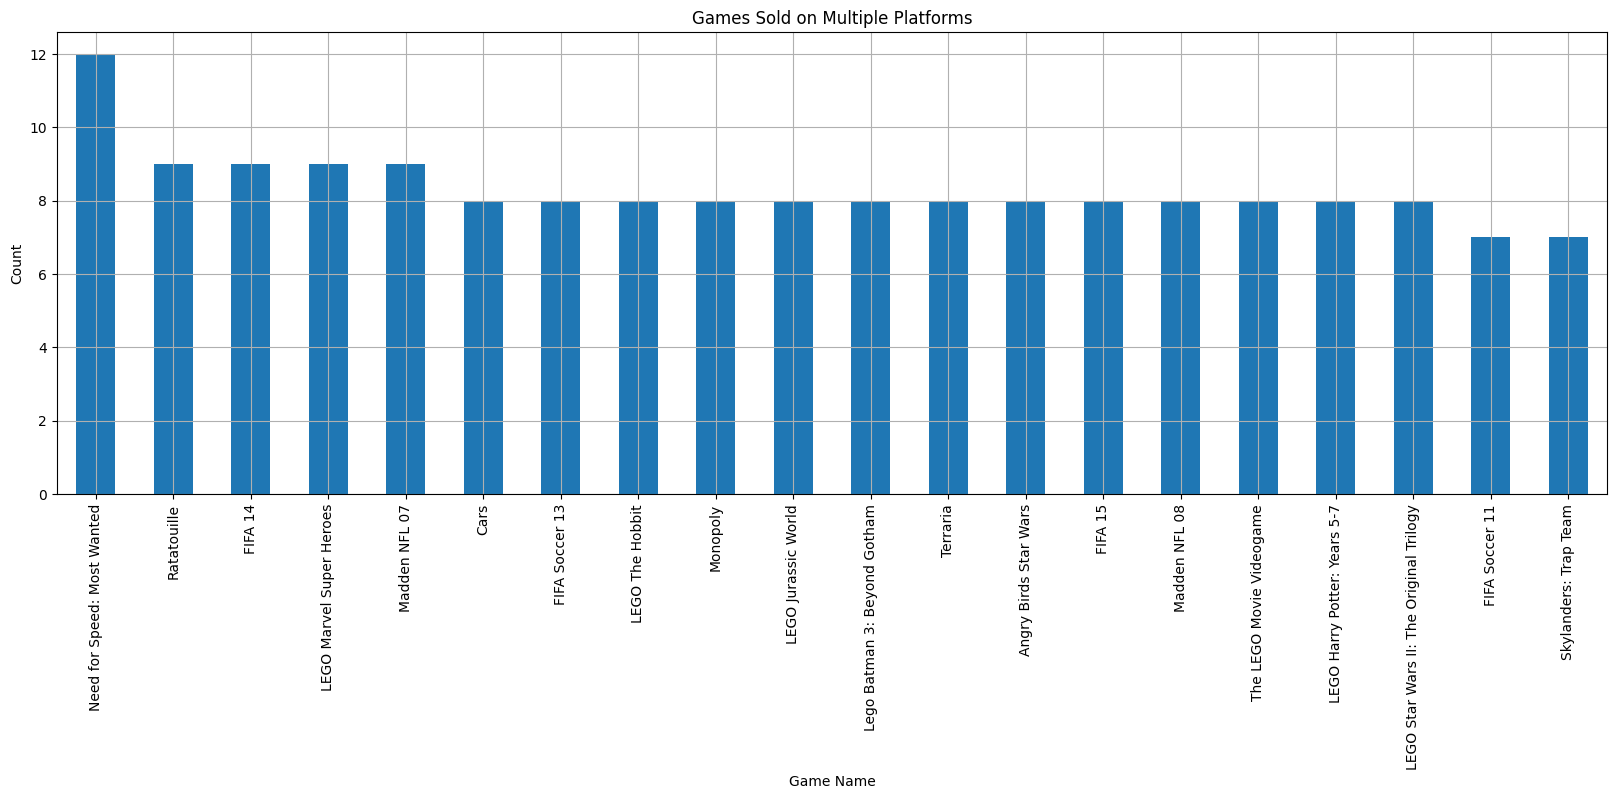

<Figure size 1000x600 with 0 Axes>

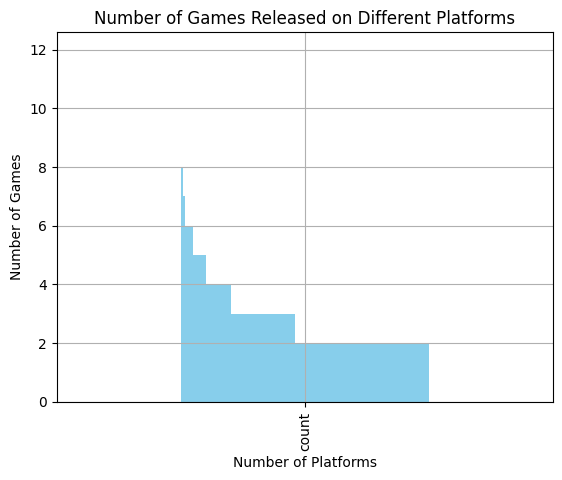

In [15]:
# Which games were sold on the most platforms?
# Count the occurrences of each game in the DataFrame
game_counts = vgsales['Name'].value_counts()

# Filter games that were sold on multiple platforms
games_on_multiple_platforms = game_counts[game_counts > 1]

# Print the total count of duplicates and the list of games
total_count_duplicates = games_on_multiple_platforms.sum()
print("Total count of duplicates:", total_count_duplicates)

print("\nGames sold on multiple platforms:")
print(games_on_multiple_platforms)

# Plotting
plt.figure(figsize=(20, 6))
games_on_multiple_platforms.head(20).plot(kind='bar', grid = True)
plt.title('Games Sold on Multiple Platforms')
plt.xlabel('Game Name')
plt.ylabel('Count')
plt.show()

df = pd.DataFrame(games_on_multiple_platforms).transpose()
# Create a bar plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', legend=False, color='skyblue',grid=True)
plt.title('Number of Games Released on Different Platforms')
plt.xlabel('Number of Platforms')
plt.ylabel('Number of Games')
plt.show()


Platform
2600      97.0
3DO        0.0
3DS      247.0
DC        16.0
DS       822.0
GB       255.0
GBA      318.0
GC       199.0
GEN       28.0
GG         0.0
N64      219.0
NES      251.0
NG         1.0
PC       259.0
PCFX       0.0
PS       731.0
PS2     1256.0
PS3      958.0
PS4      278.0
PSP      296.0
PSV       62.0
SAT       34.0
SCD        2.0
SNES     200.0
TG16       0.0
WS         1.0
Wii      927.0
WiiU      82.0
X360     980.0
XB       258.0
XOne     141.0
Name: Global_Sales, dtype: float64


<Axes: xlabel='Platform'>

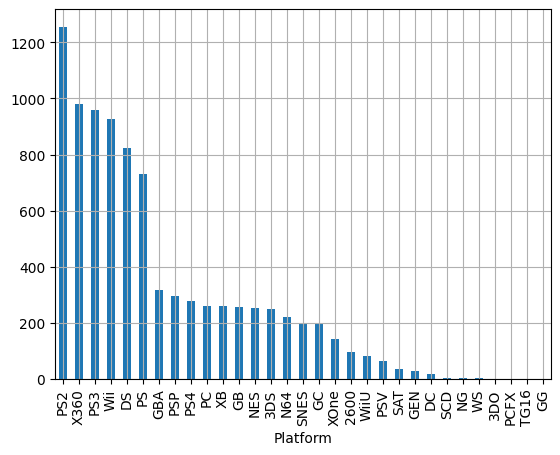

In [16]:
#what are the platforms with the most sold games in volume?
consoles_sell = vgsales.groupby("Platform")["Global_Sales"].sum().round()
print(consoles_sell)
sorted_consoles_sell = consoles_sell.sort_values(ascending=False)
sorted_consoles_sell.plot(kind="bar", grid = True)

Total games sold in each year:
      Year  Total_Sales
28  2008.0       678.90
29  2009.0       667.30
27  2007.0       611.13
30  2010.0       600.45
26  2006.0       521.04
31  2011.0       515.99
25  2005.0       459.94
24  2004.0       419.31
22  2002.0       395.52
33  2013.0       368.11
32  2012.0       363.54
23  2003.0       357.85
34  2014.0       337.05
21  2001.0       331.47
35  2015.0       264.44
18  1998.0       256.47
19  1999.0       251.27
20  2000.0       201.56
17  1997.0       200.98
16  1996.0       199.15
15  1995.0        88.11
14  1994.0        79.17
12  1992.0        76.16
9   1989.0        73.45
36  2016.0        70.93
5   1985.0        53.94
4   1984.0        50.36
10  1990.0        49.39
8   1988.0        47.22
13  1993.0        45.98
6   1986.0        37.07
1   1981.0        35.77
11  1991.0        32.23
2   1982.0        28.86
7   1987.0        21.74
3   1983.0        16.79
0   1980.0        11.38
37  2017.0         0.05


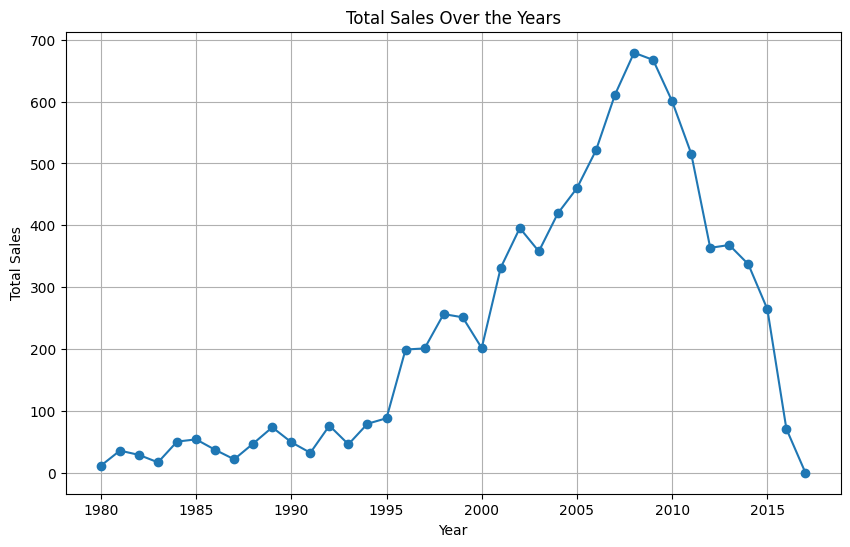

In [17]:
#What years sold the most games
years_sell = vgsales.groupby("Year")["Global_Sales"].sum().round(2).reset_index()
years_sell.columns = ["Year", "Total_Sales"]
sorted_years_sell = years_sell.sort_values(by="Total_Sales", ascending=False)

print("Total games sold in each year:")
print(sorted_years_sell)
#graphics now
plt.figure(figsize=(10, 6))
plt.plot(years_sell["Year"], years_sell["Total_Sales"], marker='o', linestyle='-')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Total sales by region:
JP_Sales        1291.02
EU_Sales        2434.13
NA_Sales        4392.68
Other_Sales      797.73
Global_Sales    8920.15
dtype: float64

Percentage of global sales:
JP_Sales         14.473075
EU_Sales         27.287994
NA_Sales         49.244463
Other_Sales       8.943011
Global_Sales    100.000000
dtype: float64


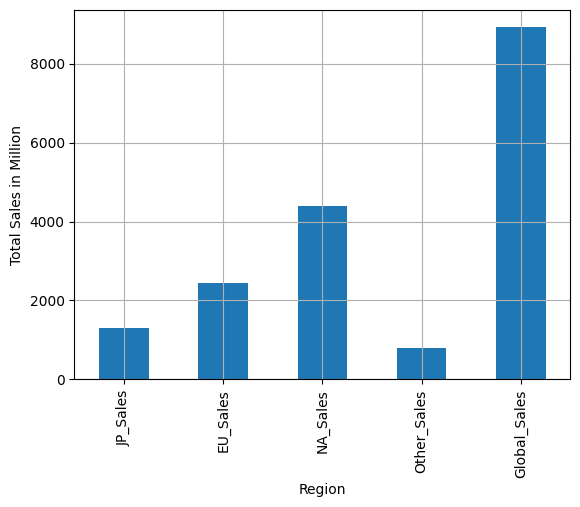

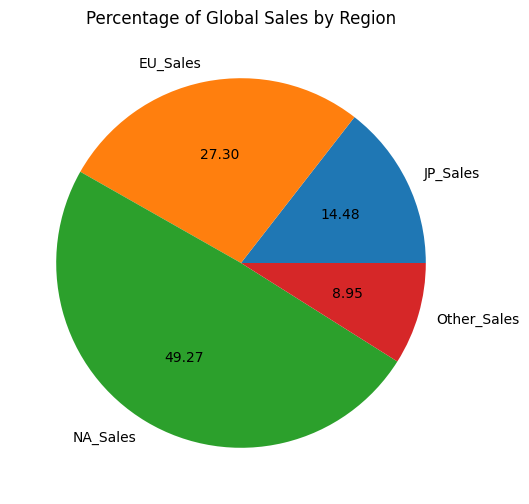

In [18]:
#what regions sold the most?
region_sales = vgsales[["JP_Sales", "EU_Sales", "NA_Sales", "Other_Sales", "Global_Sales"]].sum().round(2)

# Calculate total global sales
gl_total_sales = region_sales["Global_Sales"]

# Calculate percentages of global sales for each region
region_sales_percentage = region_sales / gl_total_sales * 100

# Display the results and declare volume (not value) and format with unit
print("Total sales by region:")
print(region_sales)
print("\nPercentage of global sales:")
print(region_sales_percentage)

region_sales.plot(kind="bar", grid = True)
plt.xlabel("Region")
plt.ylabel("Total Sales in Million")
plt.show()

#show the percentage without the global sales, because it is 100%
plt.figure(figsize=(12, 6))
region_sales_percentage.head(4).plot(kind="pie", autopct="%.2f")
plt.title('Percentage of Global Sales by Region')
plt.show()

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       391.91
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


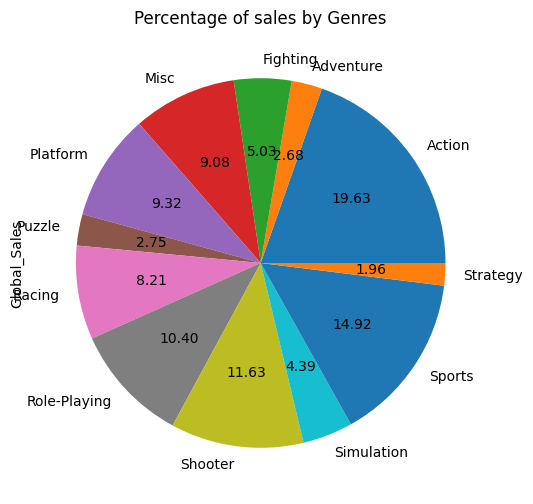

In [19]:
#what genres are most succesful
genre_sell = vgsales.groupby("Genre") ["Global_Sales"].sum().round(2)
print(genre_sell.sort_values(ascending = False))
plt.figure(figsize=(10,6))
genre_sell.plot(kind="pie", autopct="%.2f")
plt.title('Percentage of sales by Genres')
plt.show()

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.43
                                ...   
Ongakukan                         0.01
Commseed                          0.01
Takuyo                            0.01
Boost On                          0.01
Naxat Soft                        0.01
Name: Global_Sales, Length: 578, dtype: float64


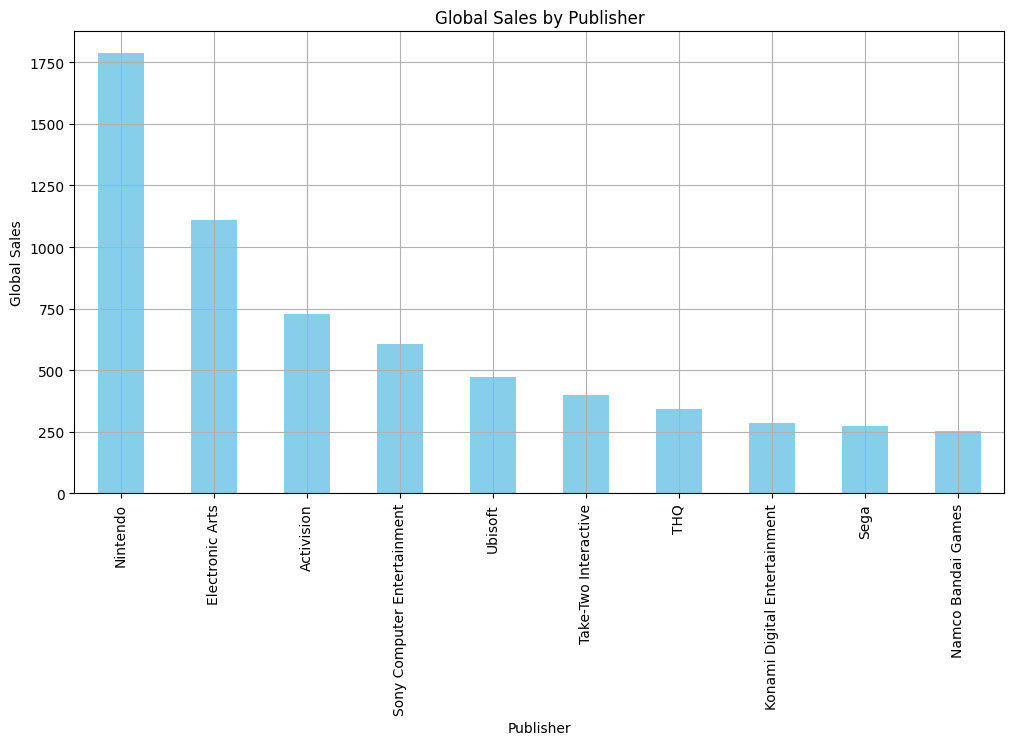

In [20]:
#who are the most succesful publishers?
publisher_sell = vgsales.groupby("Publisher")["Global_Sales"].sum().round(2).sort_values(ascending= False)
print(publisher_sell)

plt.figure(figsize=(12, 6))
publisher_sell.head(10).plot(kind="bar",grid = True, color="skyblue")
plt.title('Global Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()